#**THE SPARKS FOUNDATION**

#**Graduate Rotational Internship Program**

##***Data Science And Business Analytics Tasks***

###**Author: Akash Jain**


##**TASK 6 - Prediction using Decision Tree Algorithm**

* Problem Statement: Create the Decision Tree classifier and visualize it graphically.
* Dataset : https://bit.ly/3kXTdox
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.



In [1]:
# Importing all the important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

#**Loading Dataset**


In [2]:
# Read the CSV files
df=pd.read_csv(r'/content/drive/MyDrive/dataset/Iris.csv')

In [3]:
# Sample Dataset
df.head() 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of Dataset
print('Shape:', df.shape)

Shape: (150, 5)


In [5]:
# Dataset Columns
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# Dataset Sumamry
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# Dataset Statistical Description
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

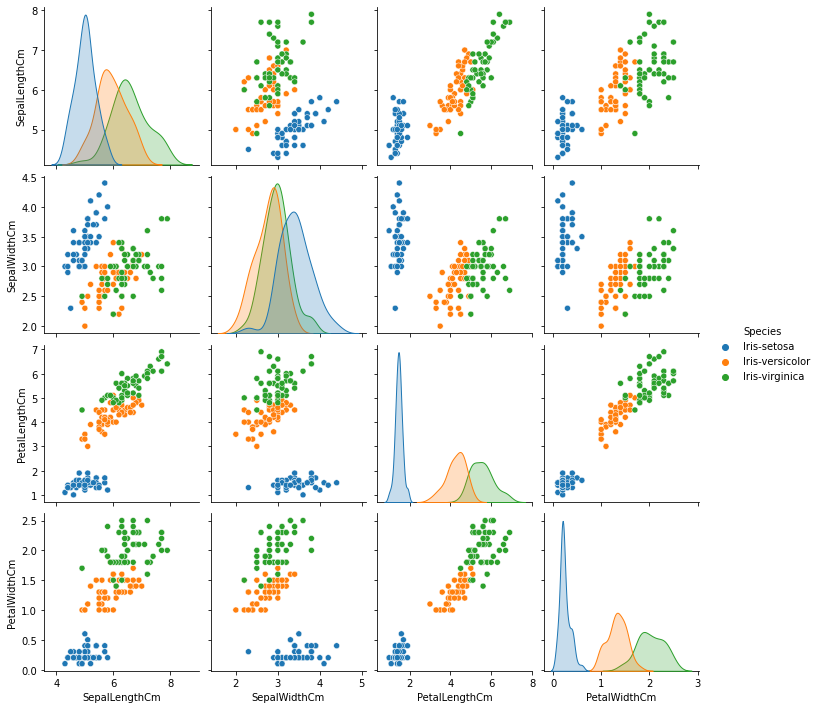

In [9]:
sb.pairplot(df,hue='Species')


# **Correalation Heatmap**

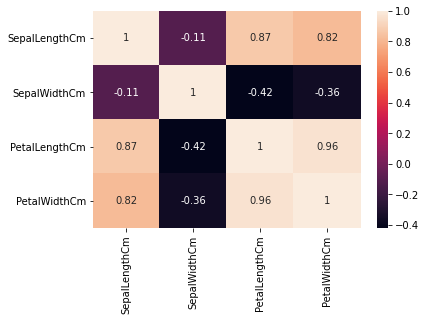

In [10]:
corr = df.corr(method ='pearson')
sb.heatmap(corr, annot = True)

# **Label Encoding**

In [11]:
LE = LabelEncoder()

iris_df_LE = df 
iris_df_LE.Species = LE.fit_transform(iris_df_LE.Species)

for col in iris_df_LE.columns:
    print(col,':',len(iris_df_LE[col].unique()),'labels')

SepalLengthCm : 35 labels
SepalWidthCm : 23 labels
PetalLengthCm : 43 labels
PetalWidthCm : 22 labels
Species : 3 labels


In [12]:
# Independent variables 
X=df.iloc[:,0:4]

# Dependent variable
Y=df['Species']

print(X.shape,Y.shape)

(150, 4) (150,)


# **SPLITTING INTO TEST & TRAIN**

In [13]:
# Spliting in TEST & TRAIN
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0,stratify=Y)

In [14]:
# For checking the distribution in the training dataset
y_train=pd.Series(y_train)
y_train.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Species, dtype: float64

# **TRAINING MODEL**

In [15]:
dtree_clf=DecisionTreeClassifier(criterion = "entropy")
dtree_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# **VISUALIZING TREE**

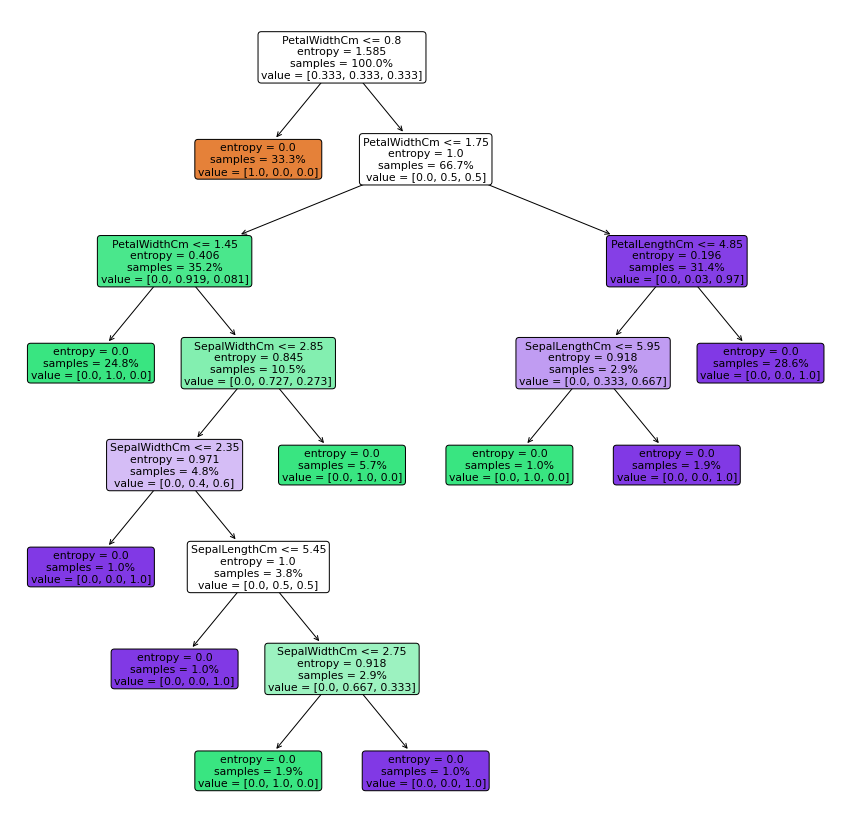

In [16]:
cols=list(X.columns.values)
plt.figure(figsize=(15,15))
tree.plot_tree(dtree_clf,feature_names=cols,
               filled=True,precision=3,proportion=True,rounded=True)
plt.show()

# **PREDICTING**

In [17]:
y_pred=dtree_clf.predict(x_test)


In [18]:
#Checking Misclassification
cm=confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  2, 13]])

In [19]:
dtree_clf.score(x_test,y_test)

0.9111111111111111

The accuracy score in case of testing it is 91.11%.



# **Conclusion**
Model was built as per the probem statement and the accuracy score of the model is 91.11%. with the testing data.

